In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
san = pd.read_csv("sanfrancisco_incidents_summer_2014.csv")
sea = pd.read_csv("seattle_incidents_summer_2014.csv")

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3/dist-packages/pandas/io/parsers.py:1070: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


## Overview dataframes


In [149]:
sea.head(3)

,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year
0,483839,2015218538,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,06/28/2015 10:31:00 AM,06/28/2014 10:31:00 AM,06/28/2015 10:31:00 AM,6XX BLOCK OF NW 74 ST,J,J2,2900.3013,-122.364672,47.682524,"(47.68252427, -122.364671996)",6,2014
1,481252,2015213067,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,06/24/2015 11:09:00 AM,06/01/2014 12:00:00 AM,06/24/2015 11:09:00 AM,23XX BLOCK OF 43 AV E,C,C2,6300.1004,-122.277080,47.639901,"(47.639900761, -122.277080248)",6,2014
2,481375,2015210301,2316,0,THEFT-MAIL,2300,MAIL THEFT,06/22/2015 09:22:00 AM,08/31/2014 09:00:00 AM,NaN,81XX BLOCK OF 11 AV SW,F,F3,11300.5013,-122.349312,47.529232,"(47.529232299, -122.349312181)",8,2014


In [150]:
san.head(3)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000
2,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795,37.780036,"(37.7800356268394, -122.409795194505)",14617792306244


In [151]:
print('------------SEA---------')
print(sea.info())
print('--------SAN---------')
print(san.info())

------------SEA---------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 32779 entries, 0 to 32778
Data columns (total 19 columns):
RMS CDW ID                           32779 non-null int64
General Offense Number               32779 non-null int64
Offense Code                         32779 non-null object
Offense Code Extension               32779 non-null int64
Offense Type                         32779 non-null object
Summary Offense Code                 32779 non-null object
Summarized Offense Description       32779 non-null object
Date Reported                        32779 non-null object
Occurred Date or Date Range Start    32779 non-null object
Occurred Date Range End              16499 non-null object
Hundred Block Location               32779 non-null object
District/Sector                      32722 non-null object
Zone/Beat                            32723 non-null object
Census Tract 2000                    32645 non-null float64
Longitude                            32779

## Data wrangling
I chose question:
> For either city, how do incidents vary by neighborhood?

> Which incidents are most common in the city center? 

> In what areas or neighborhoods are robberies or thefts most common?


So, I left only Districts and Offenses in both datasets

In [152]:
dis_sea = sea[['District/Sector', 'Offense Type']]
dis_san = san[['PdDistrict', 'Category']]

Drop all NA-s from datasets

In [153]:
dis_sea = dis_sea.dropna()
dis_san = dis_san.dropna()

In [154]:
counted_sea = dis_sea['District/Sector'].value_counts()
print(counted_sea)
print()
counted_san = dis_san['PdDistrict'].value_counts()
print(counted_san)

M     2642
K     2379
B     2338
N     2333
E     2255
J     2204
U     2160
D     2063
L     1982
R     1841
Q     1805
C     1680
S     1607
F     1594
G     1394
W     1324
O     1081
99      40
dtype: int64

SOUTHERN      5739
MISSION       3700
NORTHERN      3589
CENTRAL       3513
BAYVIEW       2725
INGLESIDE     2378
TENDERLOIN    2257
TARAVAL       1853
PARK          1693
RICHMOND      1546
dtype: int64


## Number of crimes in districts of two cities

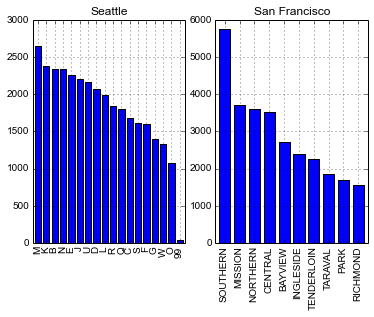

In [155]:
fig = plt.figure()

fig.add_subplot(121)
counted_sea.plot(kind='bar')
plt.title("Seattle")
fig.add_subplot(122)

counted_san.plot(kind='bar')
plt.title("San Francisco")
plt.show()

In figures we can see the number of crimes in every districs of both cities, also districts are sorted by number of crimes. Let's Central district in Seattle will be "C" (I didn't find information how to decode those letters).

In [156]:
print("Top-4 crimes in central district")
print("Seattle")
counted_sea_c = dis_sea['Offense Type'][dis_sea['District/Sector'] == 'C'].value_counts()
print(counted_sea_c[:4])
print()
print("San Francisco")
counted_san_c = dis_san.Category[dis_san.PdDistrict == 'CENTRAL'].value_counts()
print(counted_san_c[:4])


Top-4 crimes in central district
Seattle
THEFT-CARPROWL    385
VEH-THEFT-AUTO    144
THEFT-OTH         108
PROPERTY FOUND     90
dtype: int64

San Francisco
LARCENY/THEFT     1574
NON-CRIMINAL       431
OTHER OFFENSES     326
ASSAULT            277
dtype: int64


Most frequent crimes are seen in the tables. And plot in addition :)
## Top-four crimes in central district

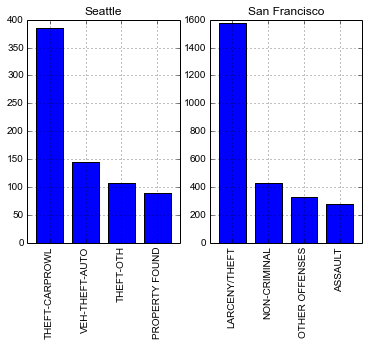

In [157]:
fig = plt.figure()

fig.add_subplot(121)
counted_sea_c[:4].plot(kind='bar')
plt.title("Seattle")
fig.add_subplot(122)

counted_san_c[:4].plot(kind='bar')
plt.title("San Francisco")
plt.show()

Don't ask me what I'm doing below >_<

In [158]:
o_t_sea = dis_sea['Offense Type'].values
d_s_sea = dis_sea['District/Sector'].values

o_t_san = dis_san['Category'].values
d_s_san = dis_san['PdDistrict'].values

In [159]:
cities_sea = []
for i in range(len(dis_sea.index)):
    p = o_t_sea[i]
    if ("THEFT" in p) or ("ROBBERY" in p):
         cities_sea.append(d_s_sea[i])
            
cities_san = []
for i in range(len(dis_san.index)):
    p = o_t_san[i]
    if ("THEFT" in p) or ("ROBBERY" in p):
         cities_san.append(d_s_san[i])
            
d_f = pd.DataFrame(cities_sea)
city_count_sea = d_f[0].value_counts()

d_f = pd.DataFrame(cities_san)
city_count_san = d_f[0].value_counts()

## Visualizing districts and incidents connected to theft and robbery

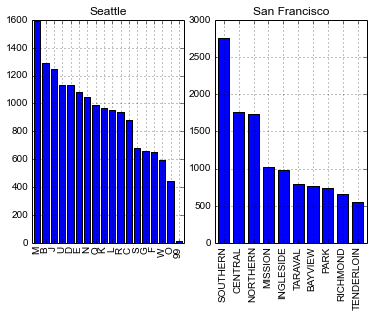

In [160]:
fig = plt.figure()

fig.add_subplot(121)
city_count_sea.plot(kind='bar')
plt.title("Seattle")

fig.add_subplot(122)
city_count_san.plot(kind='bar')
plt.title("San Francisco")
plt.show()

Only zone "M" doesn't change its position, but everything changed and a lot! 
I used the same types of charts but I think they can best show the answer on gived questions.